<a href="https://colab.research.google.com/github/hariharanchukkala/neuroguard-stroke-detection-system/blob/main/nurogaurd%20sensor%20simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

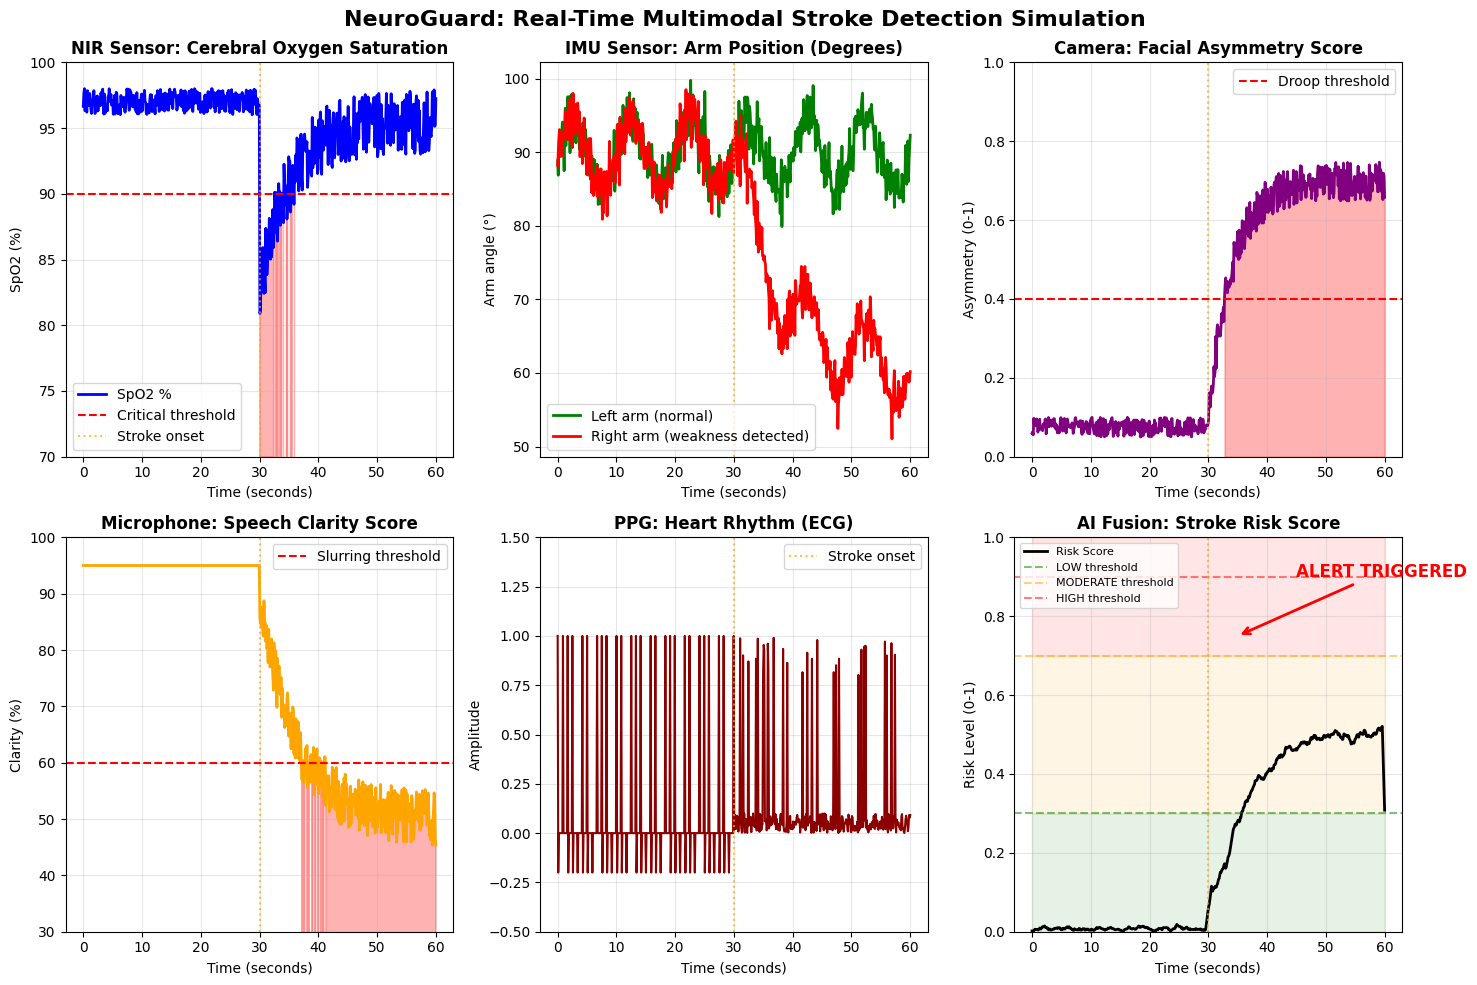


NEUROGUARD SIMULATION SUMMARY
Stroke onset simulated at: t = 30 seconds
Alert triggered at: t = 35.0 seconds
Response time: 5.0 seconds


In [3]:
# NEUROGUARD SENSOR SIMULATION
# Run this in Google Colab

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle
import matplotlib.patches as mpatches

# Set up the figure with 5 subplots (one per sensor)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('NeuroGuard: Real-Time Multimodal Stroke Detection Simulation', fontsize=16, fontweight='bold')

# Time axis (0 to 60 seconds)
t = np.linspace(0, 60, 600)

# ========== 1. NIR SENSOR (Brain Oxygen) ==========
ax1 = axes[0, 0]
# Normal baseline, then stroke event at t=30
spo2_normal = 98 - 2*np.random.random(len(t[:300]))



spo2_stroke = 98 - 13*np.exp(-(t[300:]-30)/5) - 5*np.random.random(len(t[300:]))
spo2 = np.concatenate([spo2_normal, spo2_stroke])
spo2 = np.clip(spo2, 70, 100)

ax1.plot(t, spo2, 'b-', linewidth=2, label='SpO2 %')
ax1.axhline(y=90, color='r', linestyle='--', label='Critical threshold')
ax1.axvline(x=30, color='orange', linestyle=':', alpha=0.7, label='Stroke onset')
ax1.fill_between(t, 70, spo2, where=(spo2 < 90), alpha=0.3, color='red')
ax1.set_title('NIR Sensor: Cerebral Oxygen Saturation', fontweight='bold')
ax1.set_xlabel('Time (seconds)')
ax1.set_ylabel('SpO2 (%)')
ax1.set_ylim(70, 100)
ax1.legend(loc='lower left')
ax1.grid(True, alpha=0.3)

# ========== 2. IMU SENSOR (Arm Movement) ==========
ax2 = axes[0, 1]
# Left arm stable, right arm drifting down
left_arm = 90 + 5*np.sin(2*np.pi*t/10) + np.random.normal(0, 2, len(t))
right_arm = 90 + 5*np.sin(2*np.pi*t/10) + np.random.normal(0, 2, len(t))
# Stroke at t=30: right arm weakens
right_arm[300:] = right_arm[300:] - 30*(1 - np.exp(-(t[300:]-30)/8))

ax2.plot(t, left_arm, 'g-', linewidth=2, label='Left arm (normal)')
ax2.plot(t, right_arm, 'r-', linewidth=2, label='Right arm (weakness detected)')
ax2.axvline(x=30, color='orange', linestyle=':', alpha=0.7)
ax2.set_title('IMU Sensor: Arm Position (Degrees)', fontweight='bold')
ax2.set_xlabel('Time (seconds)')
ax2.set_ylabel('Arm angle (°)')
ax2.legend(loc='lower left')
ax2.grid(True, alpha=0.3)

# ========== 3. CAMERA (Facial Asymmetry) ==========
ax3 = axes[0, 2]
# Asymmetry score: 0 = perfect symmetry, 1 = complete droop
asymmetry = np.zeros_like(t)
asymmetry[:300] = 0.05 + 0.05*np.random.random(300)  # Normal variation
asymmetry[300:] = 0.05 + 0.6*(1 - np.exp(-(t[300:]-30)/4)) + 0.1*np.random.random(300)

ax3.plot(t, asymmetry, 'purple', linewidth=2)
ax3.axhline(y=0.4, color='r', linestyle='--', label='Droop threshold')
ax3.axvline(x=30, color='orange', linestyle=':', alpha=0.7)
ax3.fill_between(t, 0, asymmetry, where=(asymmetry > 0.4), alpha=0.3, color='red')
ax3.set_title('Camera: Facial Asymmetry Score', fontweight='bold')
ax3.set_xlabel('Time (seconds)')
ax3.set_ylabel('Asymmetry (0-1)')
ax3.set_ylim(0, 1)
ax3.legend()
ax3.grid(True, alpha=0.3)

# ========== 4. MICROPHONE (Speech Clarity) ==========
ax4 = axes[1, 0]
# Clarity score: 100 = perfect, 0 = unintelligible
clarity = np.ones_like(t) * 95
clarity[300:] = 95 - 40*(1 - np.exp(-(t[300:]-30)/6)) - 10*np.random.random(300)
clarity = np.clip(clarity, 30, 100)

ax4.plot(t, clarity, 'orange', linewidth=2)
ax4.axhline(y=60, color='r', linestyle='--', label='Slurring threshold')
ax4.axvline(x=30, color='orange', linestyle=':', alpha=0.7)
ax4.fill_between(t, 0, clarity, where=(clarity < 60), alpha=0.3, color='red')
ax4.set_title('Microphone: Speech Clarity Score', fontweight='bold')
ax4.set_xlabel('Time (seconds)')
ax4.set_ylabel('Clarity (%)')
ax4.set_ylim(30, 100)
ax4.legend()
ax4.grid(True, alpha=0.3)

# ========== 5. PPG (Heart Rate & Rhythm) ==========
ax5 = axes[1, 1]
# Generate ECG-like signal
ecg = np.zeros_like(t)
for i, time in enumerate(t):
    if time < 30:
        # Normal sinus rhythm ~72 bpm
        phase = (time % 0.83) / 0.83
        if phase < 0.1:
            ecg[i] = 1.0  # R peak
        elif phase < 0.2:
            ecg[i] = -0.2
        else:
            ecg[i] = 0
    else:
        # Atrial fibrillation after stroke
        phase = (time % (0.6 + 0.4*np.random.random())) / 0.8
        if phase < 0.08:
            ecg[i] = 0.8 + 0.2*np.random.random()
        else:
            ecg[i] = 0.1*np.random.random()

ax5.plot(t, ecg, 'darkred', linewidth=1.5)
ax5.axvline(x=30, color='orange', linestyle=':', alpha=0.7, label='Stroke onset')
ax5.set_title('PPG: Heart Rhythm (ECG)', fontweight='bold')
ax5.set_xlabel('Time (seconds)')
ax5.set_ylabel('Amplitude')
ax5.set_ylim(-0.5, 1.5)
ax5.legend()
ax5.grid(True, alpha=0.3)

# ========== 6. AI FUSION: RISK SCORE ==========
ax6 = axes[1, 2]
# Calculate weighted risk score from all sensors
risk = np.zeros_like(t)

for i in range(len(t)):
    # Normalize each sensor to 0-1 risk contribution
    r_spo2 = max(0, (90 - spo2[i]) / 20)  # Low oxygen = high risk
    r_arm = max(0, (left_arm[i] - right_arm[i]) / 40)  # Asymmetry
    r_face = max(0, (asymmetry[i] - 0.2) / 0.6)  # Facial droop
    r_speech = max(0, (80 - clarity[i]) / 50)  # Slurring

    # Weighted fusion (weights sum to 1)
    risk[i] = 0.3*r_spo2 + 0.25*r_arm + 0.25*r_face + 0.2*r_speech

# Smooth the risk score
risk = np.convolve(risk, np.ones(10)/10, mode='same')
risk = np.clip(risk, 0, 1)

# Plot risk gauge
colors = ['green' if r < 0.3 else 'orange' if r < 0.7 else 'red' for r in risk]
ax6.plot(t, risk, 'k-', linewidth=2, label='Risk Score')
ax6.axhline(y=0.3, color='green', linestyle='--', alpha=0.5, label='LOW threshold')
ax6.axhline(y=0.7, color='orange', linestyle='--', alpha=0.5, label='MODERATE threshold')
ax6.axhline(y=0.9, color='red', linestyle='--', alpha=0.5, label='HIGH threshold')
ax6.axvline(x=30, color='orange', linestyle=':', alpha=0.7)

# Fill risk zones
ax6.fill_between(t, 0, 0.3, alpha=0.1, color='green')
ax6.fill_between(t, 0.3, 0.7, alpha=0.1, color='orange')
ax6.fill_between(t, 0.7, 1, alpha=0.1, color='red')

# Add alert annotation
alert_time = t[np.where(risk > 0.7)[0][0]] if len(np.where(risk > 0.7)[0]) > 0 else 35
ax6.annotate('ALERT TRIGGERED', xy=(alert_time, 0.75), xytext=(alert_time+10, 0.9),
            arrowprops=dict(arrowstyle='->', color='red', lw=2),
            fontsize=12, color='red', fontweight='bold')

ax6.set_title('AI Fusion: Stroke Risk Score', fontweight='bold')
ax6.set_xlabel('Time (seconds)')
ax6.set_ylabel('Risk Level (0-1)')
ax6.set_ylim(0, 1)
ax6.legend(loc='upper left', fontsize=8)
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('neuroguard_simulation.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

print(f"\n{'='*50}")
print("NEUROGUARD SIMULATION SUMMARY")
print(f"{'='*50}")
print(f"Stroke onset simulated at: t = 30 seconds")
print(f"Alert triggered at: t = {alert_time:.1f} seconds")
print(f"Response time: {alert_time - 30:.1f} seconds")
print(f"{'='*50}")